In [ ]:
import zipfile
import os

# Define file paths
train_path = "/content/TRAIN_SET.zip"
test_path = "/content/TEST_SET.zip"

# Extract TRAIN_SET
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall("/content/train")

# Extract TEST_SET
with zipfile.ZipFile(test_path, 'r') as zip_ref:
    zip_ref.extractall("/content/test")

print("Extraction complete!")



Extraction complete!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size for model input
IMAGE_SIZE = (224, 224)  # You can change this based on your model
BATCH_SIZE = 32

# Train data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    "/content/train/TRAIN_SET",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    "/content/train/TRAIN_SET",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Create test generator
test_generator = test_datagen.flow_from_directory(
    "/content/test/TEST_SET",
    target_size=IMAGE_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 2102 images belonging to 5 classes.
Found 524 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Number of classes (fruits)
NUM_CLASSES = 5

# Load MobileNetV2 without the top layer (include_top=False)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # You can increase to 15 or 20 later
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 47s 535ms/step - accuracy: 0.8793 - loss: 0.3369 - val_accuracy: 1.0000 - val_loss: 1.5750e-04
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 369ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 2.1203e-04
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 363ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.5445e-05
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 1.0000 - loss: 4.4514e-04 - val_accuracy: 1.0000 - val_loss: 2.2921e-05
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - accuracy: 1.0000 - loss: 5.9407e-04 - val_accuracy: 1.0000 - val_loss: 4.4614e-05
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 6.8648e-05
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 372ms/step - accuracy: 0.9992 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 1.5600e-05
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 374ms/step - accura

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 1.0000 - loss: 9.7170e-04
Test Accuracy: 100.00%


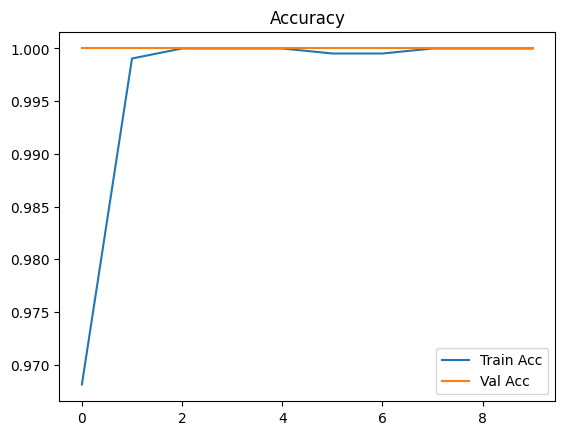

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16

# Load VGG16 without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Add classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history_vgg = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # start with 10
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 59s 679ms/step - accuracy: 0.4852 - loss: 1.2894 - val_accuracy: 0.8149 - val_loss: 0.3949
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 466ms/step - accuracy: 0.8378 - loss: 0.4232 - val_accuracy: 0.9466 - val_loss: 0.2357
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 460ms/step - accuracy: 0.9055 - loss: 0.2597 - val_accuracy: 1.0000 - val_loss: 0.1307
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 495ms/step - accuracy: 0.9284 - loss: 0.2028 - val_accuracy: 0.9981 - val_loss: 0.1120
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 461ms/step - accuracy: 0.9571 - loss: 0.1399 - val_accuracy: 0.9981 - val_loss: 0.0705
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 468ms/step - accuracy: 0.9677 - loss: 0.1112 - val_accuracy: 1.0000 - val_loss: 0.0381
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 458ms/step - accuracy: 0.9794 - loss: 0.0902 - val_accuracy: 1.0000 - val_loss: 0.0362
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 488ms/step - accuracy: 0.9781 - loss: 0.0803 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"VGG16 Test Accuracy: {test_acc*100:.2f}%")


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9875 - loss: 0.0391
VGG16 Test Accuracy: 99.15%


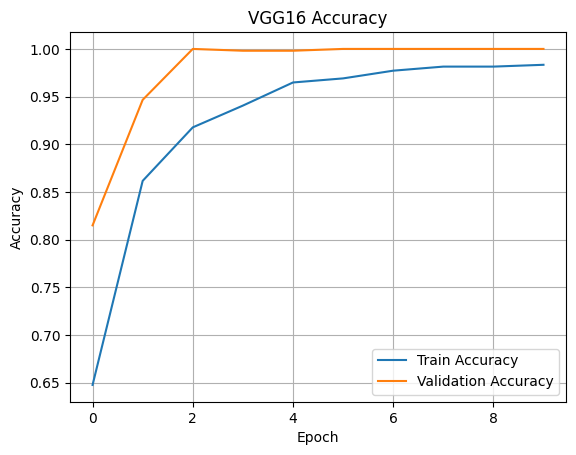

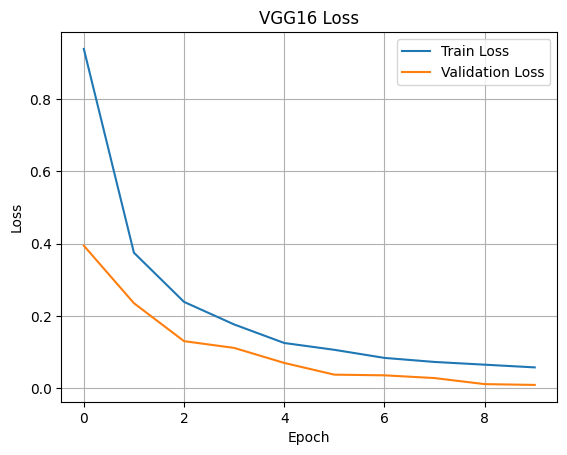

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("fruit_classifier_mobilenetv2.h5")


In [ ]:
with open("nutrition_data.csv", "w") as f:
    f.write("""Food,Calories,Protein(g),Carbs(g),Fat(g)
Banana,89,1.1,22.8,0.3
Apple,52,0.3,13.8,0.2
Orange,47,0.9,11.8,0.1
Pineapple,50,0.5,13.1,0.1
Watermelon,30,0.6,7.6,0.2""")


In [ ]:
import pandas as pd
df = pd.read_csv("nutrition_data.csv")
df.head()


,Food,Calories,Protein(g),Carbs(g),Fat(g)
0,Banana,89,1.1,22.8,0.3
1,Apple,52,0.3,13.8,0.2
2,Orange,47,0.9,11.8,0.1
3,Pineapple,50,0.5,13.1,0.1
4,Watermelon,30,0.6,7.6,0.2


In [ ]:
from google.colab import files
files.download("nutrition_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install flask-ngrok
!pip install flask


In [ ]:
with open("app.py", "w") as f:
    f.write("""
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import os

# Initialize app and model
app = Flask(__name__)
model = load_model("/content/fruit_classifier_mobilenetv2.h5")

# Define classes
class_names = ['APPLE', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']

# Read nutrition data
nutrition_df = pd.read_csv("nutrition_data.csv")

# Ensure upload folder exists
UPLOAD_FOLDER = os.path.join("static", "uploads")
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

@app.route("/", methods=["GET", "POST"])
def index():
    prediction = None
    img_path = None
    nutrition_info = None

    if request.method == "POST":
        img_file = request.files["image"]

        if img_file:
            img_filename = img_file.filename
            img_path = os.path.join(UPLOAD_FOLDER, img_filename)
            img_file.save(img_path)

            # Preprocess image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            preds = model.predict(img_array)
            class_idx = np.argmax(preds[0])
            prediction = class_names[class_idx]

            # Fetch nutrition info (case insensitive match)
            nutrition_row = nutrition_df[nutrition_df['Food'].str.upper() == prediction]
            if not nutrition_row.empty:
                nutrition_info = nutrition_row.to_dict('records')[0]

    return render_template("index.html", prediction=prediction, img_path=img_path, nutrition=nutrition_info)

if __name__ == "__main__":
    app.run(debug=True)
""")


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok config add-authtoken 2yge3yjqMtwxMuCO40f3wvGkTyY_4paLDv3dyHEkkrH2n8QfP

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
from app import app

public_url = ngrok.connect(5000)
print("🔥 Public URL:", public_url)

app.run()


🔥 Public URL: NgrokTunnel: "https://aa4a-34-142-141-218.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app 'app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:24:00] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:24:01] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:24:07] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:24:08] "GET /static/uploads/100_100.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:37:21] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:37:34] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:37:35] "GET /static/uploads/0_100.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:37:49] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:37:49] "GET /static/uploads/100_100.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:49:43] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:50:01] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:50:02] "GET /static/uploads/0_100.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:50:34] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 09:50:34] "GET /static/uploads/100_100.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:18:55] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:19:16] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:19:16] "GET /static/uploads/0_100.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:19:43] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:19:43] "GET /static/uploads/100_100.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:39:00] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:39:18] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:39:19] "GET /static/uploads/0_100.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:39:45] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:39:46] "GET /static/uploads/100_100.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:57:30] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:57:46] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:57:46] "GET /static/uploads/0_100.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:58:14] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Jun/2025 10:58:14] "GET /static/uploads/100_100.jpg HTTP/1.1" 200 -


In [ ]:
import os
os.listdir("/content")
